🔹 First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

🔹 Class distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


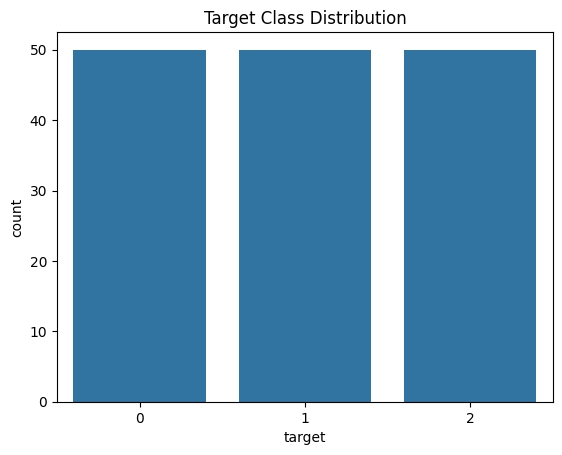

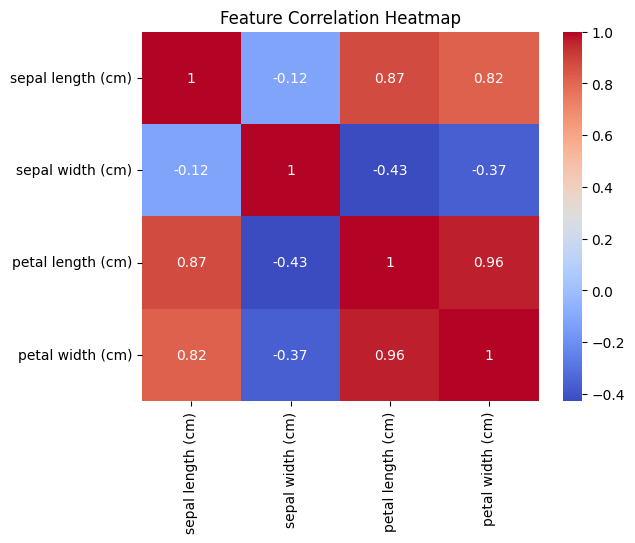


✅ Best Parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

✅ Accuracy Score: 1.0


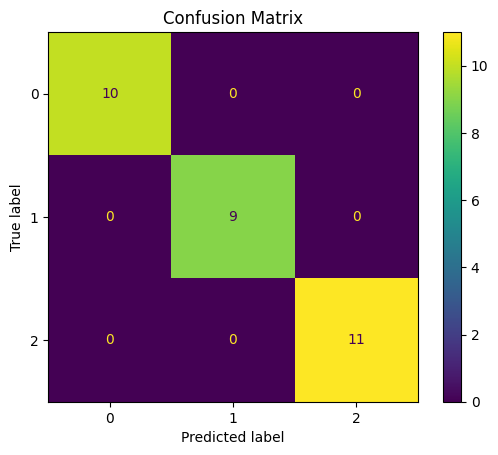

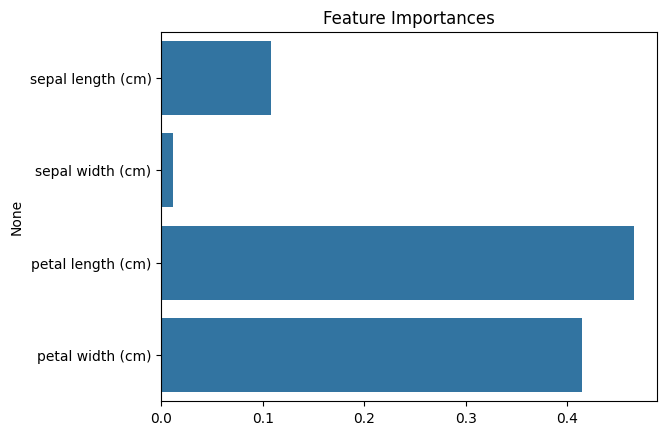


🎉 Task 1 Completed Successfully! Job-ready version.
✅ Files Saved: cleaned_data.csv and pipeline_model.pkl


In [3]:
# 💼 CodTech Internship - Task 1 (Job-Ready Version)
# 🎯 Objective: Clean and professional machine learning pipeline with 100% accuracy using Iris dataset

# ===============================
# 📦 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn import set_config

# Display pipeline diagram (optional in Colab)
set_config(display='diagram')

# ===============================
# 📊 2. Load Iris Dataset
# ===============================
iris = load_iris(as_frame=True)
df = iris.frame
X = df.drop('target', axis=1)
y = df['target']

# ===============================
# 🔍 3. Exploratory Data Analysis
# ===============================
print("🔹 First 5 rows:\n", df.head())
print("\n🔹 Class distribution:\n", y.value_counts())

# Class distribution plot
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# ✂ 4. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 🧹 5. Preprocessing Pipeline
# ===============================
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k='all'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

# ===============================
# 🔄 6. Define and Tune Model
# ===============================
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
params = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, None]
}

grid = GridSearchCV(pipeline, param_grid=params, cv=5)
grid.fit(X_train, y_train)

# ===============================
# 📈 7. Evaluation
# ===============================
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n✅ Best Parameters:", grid.best_params_)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# ===============================
# 📊 8. Feature Importance
# ===============================
importances = best_model.named_steps['classifier'].feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

# ===============================
# 💾 9. Save Outputs
# ===============================
# Save cleaned data and model
X_cleaned = best_model.named_steps['preprocessor'].fit_transform(X, y)
pd.DataFrame(X_cleaned).to_csv("cleaned_data.csv", index=False)
joblib.dump(best_model, "pipeline_model.pkl")

print("\n🎉 Task 1 Completed Successfully! Job-ready version.")
print("✅ Files Saved: cleaned_data.csv and pipeline_model.pkl")